In [60]:
import numpy as np
import pandas as pd
import importlib

import ipywidgets as widgets
import optuna

In [92]:
import cpagent
import cprender
import cpenvs
import cppid

_ = importlib.reload(cppid)
_ = importlib.reload(cpagent)
_ = importlib.reload(cprender)
_ = importlib.reload(cpenvs)

In [64]:
def objective(trial: optuna.Trial):
    agent = cppid.PidAgentMoving2(
        (
            trial.suggest_float("KP_pole", 1e-3, 1e0, log=True),
            trial.suggest_float("KI_pole", 1e-4, 1e0, log=True), 
            trial.suggest_float("KD_pole", 1e-3, 1e1, log=True)
        ), 
        (
            trial.suggest_float("KP_cart", 1e-4, 1e0, log=True),
            0.0,
            trial.suggest_float("KD_cart", 1e-6, 1e-1, log=True),
        ),
        trial.suggest_float("A", 0.05, 5, log=True),
    )

    NUM_EP = 20
    df = cpagent.execute_cartpole(agent, env=cpenvs.MovingCartpoleEnv(), num_episodes=NUM_EP)
    reward = df["reward"].sum() / float(NUM_EP)
    return reward

In [65]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

[I 2024-02-24 12:26:57,348] A new study created in memory with name: no-name-aee6c245-2db3-40d3-8b61-1b124df2c86e
[I 2024-02-24 12:26:57,434] Trial 0 finished with value: 64.98289708136849 and parameters: {'KP_pole': 0.029018786378226257, 'KI_pole': 0.00562756394763124, 'KD_pole': 0.08730541143694182, 'KP_cart': 0.18971908487560846, 'KD_cart': 3.1408030934669703e-06, 'A': 0.5833230348185531}. Best is trial 0 with value: 64.98289708136849.
[I 2024-02-24 12:26:57,587] Trial 1 finished with value: 142.49567246645992 and parameters: {'KP_pole': 0.006940717348811673, 'KI_pole': 0.009904597840755376, 'KD_pole': 0.35174621795088296, 'KP_cart': 0.00021147437521748936, 'KD_cart': 0.0006919093664620055, 'A': 0.1470772258605949}. Best is trial 1 with value: 142.49567246645992.
[I 2024-02-24 12:26:57,775] Trial 2 finished with value: 185.61860642048586 and parameters: {'KP_pole': 0.0019462707131044964, 'KI_pole': 0.28683882322847604, 'KD_pole': 9.4825143945292, 'KP_cart': 0.011269580700140096, 'KD

In [66]:
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

  Value:  488.5919659288758
  Params: 
    KP_pole: 0.3008886954369643
    KI_pole: 0.019009765546270704
    KD_pole: 0.07971421794319843
    KP_cart: 0.06589185558244758
    KD_cart: 0.049852456966363305
    A: 1.3255732309939985


In [100]:
agent = cppid.PidAgentMoving2(
    (0.301, 0.0190, 0.0797),
    (0.0659, 0.00, 0.0499),
    1.33
)
df = cpagent.execute_cartpole(agent, env=cpenvs.MovingCartpoleEnv(), num_episodes=100)
df

,ep,t,cart_pos,cart_vel,pole_ang,pole_vel,pos_deviation,reward,cart_pos_setpoint
0,0,0,-0.044485,0.022115,0.022123,0.027435,-0.044485,NaN,0.000000
1,0,1,-0.044043,-0.173317,0.022672,0.327015,-0.044043,0.999030,0.000000
2,0,2,-0.047509,0.021475,0.029212,0.041567,-0.047509,0.998871,0.000000
3,0,3,-0.047080,0.216166,0.030043,-0.241758,-0.047080,0.998892,0.000000
4,0,4,-0.042757,0.410846,0.025208,-0.524815,-0.042757,0.999086,0.000000
...,...,...,...,...,...,...,...,...,...
50095,99,496,-0.760614,-0.346889,0.000052,0.530593,0.011153,0.999938,-0.771767
50096,99,497,-0.767551,-0.151768,0.010664,0.237927,0.004215,0.999991,-0.771767
50097,99,498,-0.770587,0.043200,0.015422,-0.051374,0.001180,0.999999,-0.771767
50098,99,499,-0.769723,0.238097,0.014395,-0.339151,0.002044,0.999998,-0.771767


In [101]:
_ = widgets.interact(
    lambda ep, t: cprender.render_cartpole_state_df(df, t, ep),
    ep=widgets.IntSlider(min=0, max=20, step=1, value=0),
    t=widgets.IntSlider(min=0, max=500, step=1, value=0),
)

interactive(children=(IntSlider(value=0, description='ep', max=20), IntSlider(value=0, description='t', max=50…

In [102]:
EP = 1

fig = cprender.lineplot(df, ep=EP)
fig.show()

In [103]:
df.groupby("ep")["reward"].sum().to_frame("ep_reward")

,ep_reward
ep,
0,493.818852
1,483.038575
2,484.552204
3,491.416856
4,487.665664
...,...
95,485.819410
96,492.148185
97,486.813129


[(450.0, 500.0)]

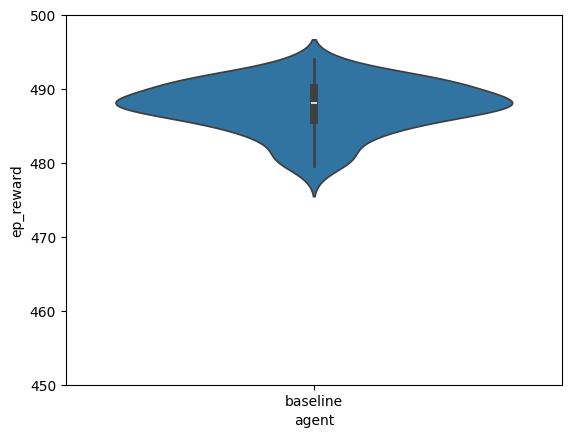

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as maxes


dfplt = df.groupby("ep")["reward"].sum().to_frame("ep_reward")
dfplt["agent"] = "baseline"

fig, ax = plt.subplots()
ax:maxes.Axes = ax

sns.violinplot(
    dfplt,
    x="agent",
    y="ep_reward",
    orient="v",
    ax=ax
)

ax.set(ylim=(450.0, 500.0))